<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.876 · Análisis de grafos y redes sociales</p>
<p style="margin: 0; text-align:right;">20221 - Máster universitario en Ciencias de datos (<i>Data science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicaciones</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

<div class="alert alert-block alert-info">
    <strong>Nombre y apellidos:</strong> Mikel Urrutxi Sagasta
</div>

# PEC 2: Estudio de técnicas de visualización de datos

En esta actividad el estudiante  tendrá que crear tres pequeñas visualizaciones usando técnicas diferentes que le serán asignadas, recibiréis un correo de vuestro profesor con la selección. Cada estudiante tendrá que escoger unos datos idóneos para cada una de las técnicas propuestas y decidir con qué software las crea. Los datos se podrán escoger de cualquier fuente de datos abiertos. El estudiante publicará las representaciones a Internet y las presentará en un video. El video deberá subirse a la zona llamada VideoPAC del aula.

Para publicar las representaciones os recordamos que hace falta que estas sean accesibles directamente con una URL, sin necesidad de registros ni inicios de sesión. Esto tanto se puede hacer en la misma plataforma donde se ha desarrollado la representación (Flourish, Tableau Public, Infogram, etc), como en un espacio gratuito como por ejemplo github, donde podéis crear un proyecto y publicar las representaciones en formato web a github.io, por ejemplo.(How to github.io)

Se trata de familiarizarse con técnicas de visualización y entender la esencia. De hecho, en lugar de ir de los datos a la visualización, en esta actividad lo hacemos a la inversa, es decir, a partir de cada técnica tenemos que ver para qué tipo de datos es adecuada y buscar un conjunto de datos que sea coherente, si puede ser sin tener que hacer ninguna transformación en los datos (para ahorraros trabajo).

A esta actividad hay que publicar las tres técnicas y un video explicativo que sigue el guión siguiente:

[Puntos 1 y 2] Presentaros siguiendo el esquema de la PEC 1.

[Puntos 1 y 2: 5%] Indicad donde está colgada la visualización y cómo  acceder.

[Punto 3: 30%] Definid cada técnica de visualización de forma general: nombre, origen, descripción/funcionamiento, ejemplos de aplicación, etc.

[Punto 4: 10%] Describid el tipo de datos que se pueden representar con cada técnica (datos cuantitativos, cualitativas? Qué estructura tienen que tener para cada técnica?). Explicar las limitaciones en cuanto a datos (hay medida mínima y máxima del juego de datos para cada técnica?).

[Punto 5: 20%] Hacer una representación con cada una de las técnicas usando un conjunto de datos abiertos (veáis más abajo algunas fuentes de datos abiertos). En total hay que hacer 3 representaciones simples con 3 conjuntos de datos escogidos por el estudiante.

[Punto 6: 30%] Comentar brevemente las tres representaciones indicando qué se representa y qué o qué aspectos muestra o demuestra cada representación.

[Punto 7: 5%] Cada una de las tres presentaciones deben tener una duración de unos 2-3 minutos. En total, el vídeo (único) con las tres técnicas no puede exceder de 7 minutos. Se penalizará salir de ese rango, porque se valora la capacidad de síntesis y de comunicación.

## 1. Carga de librerias y lectura de datos

En la siguiente celda se deben cargar todas las librerías necesarias para la ejecución de la actividad. Se debe justificar el uso de librerías adicionales.

### 1.1. Cargar librerias

Cargamos las librerias básicas para desarrollar la visualización de los datos.

In [1]:
# Librerías básicas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1.2. Lectura de datos

El calentamiento global es el aumento continuo de la temperatura media del sistema climático de la Tierra y se ha demostrado mediante mediciones directas de la temperatura y mediante mediciones de diversos efectos del calentamiento.

Por lo tanto, un conjunto de datos sobre la temperatura de las principales ciudades del mundo ayudará a analizarla. Además, la información meteorológica es útil para muchas tareas de ciencia de datos, como la previsión de ventas, la logística, etc. El siguiente enlace nos lleva a la página web donde se encuentran los datos.

https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities

In [2]:
# Lectura del archivo
df = pd.read_csv('city_temperature.csv', low_memory=False)

# Limpieza del archivo
dropList = list(df.loc[df['AvgTemperature'] == -99.0].index)
df = df.drop(dropList)

## 2. Bar chart

Un gráfico de barras es uno de los tipos de gráficos más comunes. Muestra la relación entre una variable numérica y otra categórica. Cada entidad de la variable categórica se representa como una barra. El tamaño de la barra representa su valor numérico.

### 2.1.	Para qué

Un gráfico de barras muestra la relación entre una variable numérica y una categórica. En el gráfico anterior, cada país es un nivel de la variable categórica, y la cantidad de armas vendidas es la variable numérica. Un gráfico de barras ordenado es una muy buena opción en este caso, ya que muestra tanto la clasificación de los países como su valor específico.


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 1: Representación del gráfico de barras</strong>. 
</div>

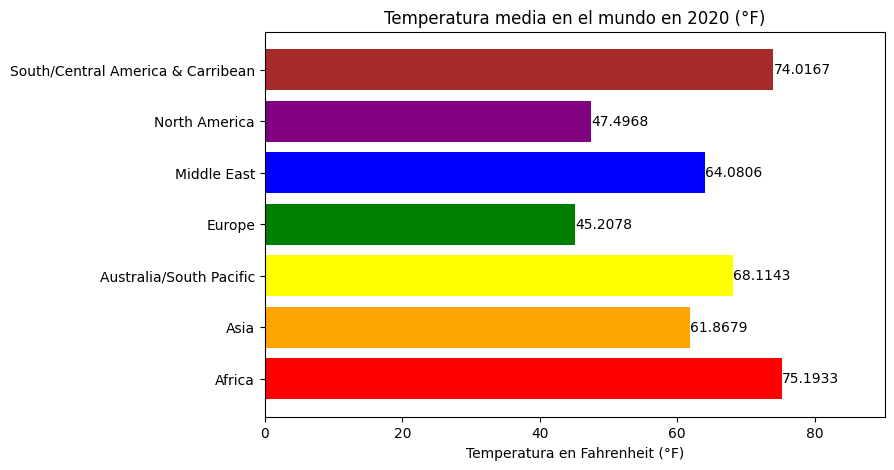

In [3]:
# Selección de datos
df2020 = df.loc[df['Year'] == 2020, ['Region', 'Year', 'AvgTemperature']]
avgTempRegion = df2020[['Region', 'AvgTemperature']].groupby('Region').mean()

# Representación del gráfico de barras
fig, ax = plt.subplots(figsize=(8,5))

bars = ax.barh(avgTempRegion.index, avgTempRegion['AvgTemperature'], 
               color=['Red', 'Orange', 'Yellow', 'Green', 'Blue', 'Purple', 'Brown'])

ax.set_title('Temperatura media en el mundo en 2020 (°F)')
ax.set_xlabel('Temperatura en Fahrenheit (°F)')
ax.bar_label(bars)
ax.margins(x=0.2)
plt.show()

## 3. Slope chart

Un gráfico de pendientes puede utilizarse para mostrar una historia de "antes y después" de diferentes valores, basándose en la comparación de sus valores en diferentes momentos. Los valores relacionados están conectados por las pendientes. Puede utilizarse para mostrar la variación de los precios de los alimentos y las bebidas entre dos años, como en este ejemplo de la derecha.

### 3.1. Para qué

Es un gráfico apropiado cuando la naturaleza del mensaje es comparar entre dos instancias o mostrar tendencias a lo largo del tiempo. Las dos instancias pueden ser: un intervalo de tiempo; dos países, regiones o continentes; En este caso, se ha representado la temperatura media en diferentes continentes del mundo en los años 1995 y 2020. El objetivo de la representación es ver la tendecia de temperaturas medias que han tenido las diferentes zonas del mundo.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 2: Representación del gráfico de pendientes</strong>
</div>

In [4]:
# Selección de datos
df95_20 = df.loc[(df['Year'] == 1995) | (df['Year'] == 2020), ['Region', 'Year', 'AvgTemperature']]
avgTempRegion95_20 = df95_20.groupby(['Region', 'Year']).mean()

print(avgTempRegion95_20)

                                        AvgTemperature
Region                            Year                
Africa                            1995       73.890036
                                  2020       75.193292
Asia                              1995       67.262985
                                  2020       61.867929
Australia/South Pacific           1995       61.199497
                                  2020       68.114303
Europe                            1995       51.539997
                                  2020       45.207751
Middle East                       1995       71.612651
                                  2020       64.080575
North America                     1995       55.582009
                                  2020       47.496804
South/Central America & Carribean 1995       70.642808
                                  2020       74.016667


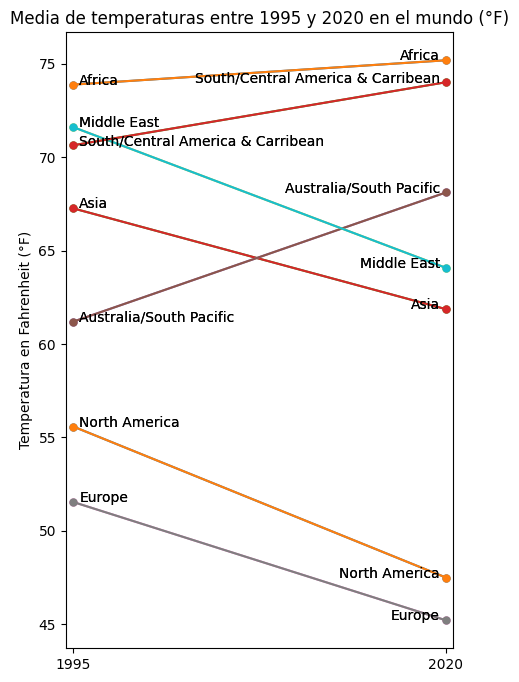

In [5]:
fig, ax = plt.subplots(figsize=(5,8))
world = avgTempRegion95_20.index.get_level_values(0)

for region in world:
    # Obtenemos un solo país de la lista
    temp = avgTempRegion95_20.loc[region]
    # Trazamos las líneas
    plt.plot(list(temp.index), temp.AvgTemperature, marker='o', markersize=5)
    # etiqueta final
    plt.text(list(temp.index)[0]+0.4, temp.AvgTemperature.values[0], region)
    # etiqueta de inicio
    plt.text(list(temp.index)[1]-0.4, temp.AvgTemperature.values[1], region, ha='right')
    
# Límites x, ticks x y etiqueta y 
plt.xlim(1994.5,2020.5)
plt.xticks([1995, 2020])
plt.title('Media de temperaturas entre 1995 y 2020 en el mundo (°F)')
plt.ylabel('Temperatura en Fahrenheit (°F)')
plt.show()

## 4. Ridgeline Chart

Un gráfico Ridgeline muestra la distribución de un valor numérico para varios grupos. La distribución puede representarse mediante histogramas o gráficos de densidad, todos ellos alineados a la misma escala horizontal y presentados con un ligero solapamiento.

### 4.1. Para qué

Los gráficos en línea recta tienen sentido cuando el número de grupos que hay que representar es medio o alto, y por tanto una separación clásica de ventanas ocuparía demasiado espacio. En efecto, el hecho de que los grupos se solapen entre sí permite utilizar el espacio de forma más eficiente. Si tiene menos de ~6 grupos, probablemente sea mejor tratar con otros gráficos de distribución.

Funciona bien cuando hay un patrón claro en el resultado, como si hay una clasificación obvia en los grupos. De lo contrario, los grupos tenderán a solaparse entre sí, lo que dará lugar a un gráfico desordenado que no proporcionará ninguna información.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 3: Representación del gráfico Ridgeline</strong>
</div>

In [6]:
# Seleccionamos los datos de temperatura en España en 2020
df_Spain2020 = df.loc[(df['Country'] == 'Spain') | (df['Year'] == 2020), ['Month', 'AvgTemperature']]

month_dict = {1: 'january', 2: 'february', 3: 'march', 4: 'april', 5: 'may', 6: 'june',
              7: 'july', 8: 'august', 9: 'september', 10: 'october', 11: 'november', 12: 'december'}

# Intercambiamos el número por el nombre del mes
df_Spain2020['Month'] = df_Spain2020['Month'].map(month_dict)

# Creamos la columna 'mean_month' con el valor de temperatura media del mes
month_mean_serie = df_Spain2020.groupby('Month')['AvgTemperature'].mean()
df_Spain2020['mean_month'] = df_Spain2020['Month'].map(month_mean_serie)

print(df_Spain2020)

           Month  AvgTemperature  mean_month
9132     january            46.3   47.453924
9133     january            45.4   47.453924
9134     january            48.0   47.453924
9135     january            53.4   47.453924
9136     january            47.3   47.453924
...          ...             ...         ...
2899535      may            42.3   62.990894
2899536      may            43.1   62.990894
2899537      may            37.8   62.990894
2899538      may            41.9   62.990894
2899539      may            48.5   62.990894

[66052 rows x 3 columns]


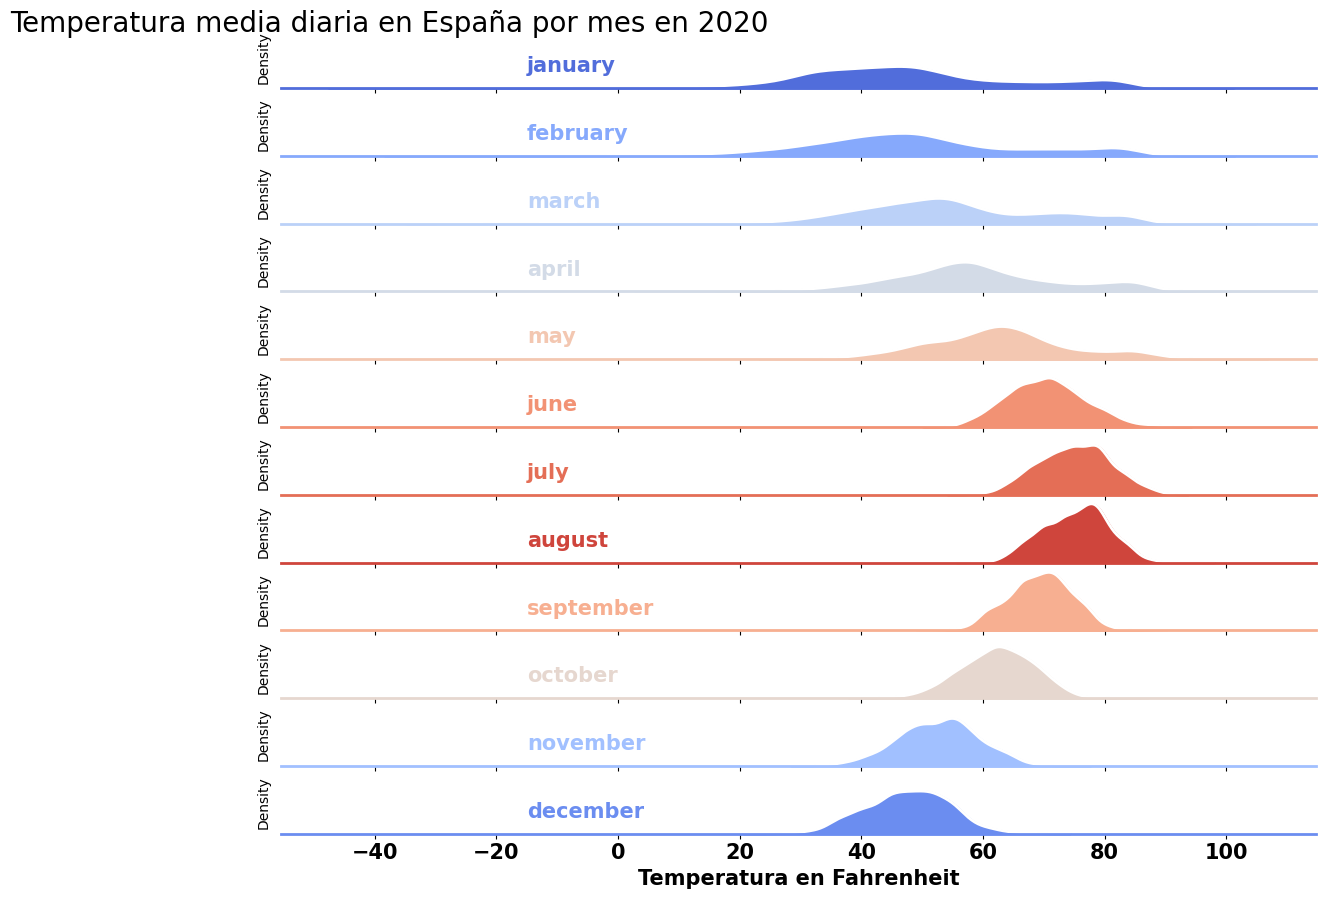

In [7]:
# Generamos una paleta de colores con Seaborn.color_palette()
pal = sns.color_palette(palette='coolwarm', n_colors=12)

# En la clase sns.FacetGrid, el argumento 'hue' es el que será representado por los colores con 'palette'
g = sns.FacetGrid(df_Spain2020, row='Month', hue='mean_month', aspect=15, height=0.75, palette=pal)

# Añadimos las densidades kdeplots para cada mes
g.map(sns.kdeplot, 'AvgTemperature',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# Añadimos una línea blanca que representa el contorno de cada kdeplot
g.map(sns.kdeplot, 'AvgTemperature', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

# Añadimos una línea horizontal para cada parcela
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# Hacemos un bucle sobre los ejes de la figura FacetGrid (g.axes.flat) y añadimos el mes como texto con el color adecuado
# Observe cómo ax.lines[-1].get_color() le permite acceder al color de la última línea en cada matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    ax.text(-15, 0.02, month_dict[i+1],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())
    
# Utilizamos la función matplotlib.Figure.subplots_adjust() para conseguir que los subplots se superpongan
g.fig.subplots_adjust(hspace=0.1)

# Eventualmente eliminamos los títulos de los ejes, los yticks y las espinas
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Temperatura en Fahrenheit', fontweight='bold', fontsize=15)
g.fig.suptitle('Temperatura media diaria en España por mes en 2020',
               ha='right',
               fontsize=20,
               fontweight=20)

plt.show()